In [540]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [541]:
def normalize(series):
    return (series-series.min())/(series.max() - series.min())

In [542]:
activity = pd.read_csv("activities.csv")
proposals = pd.read_csv("proposal-data.csv")
web_traffic = pd.read_csv("web-traffic-by-month.csv")
inbound_contacts = pd.read_csv("inbound-contacts.csv")


<h2>Sales Activity Section</h2>
Meetings, Calls, Emails, Etc.
<br>
<br>

<h3>Cleaning and Organizing data</h3>

In [543]:
activity.drop('Engagement ID', inplace=True, axis=1)

In [544]:
activity['Create date'] = pd.to_datetime(activity['Create date'])
activity.sort_values(by='Create date')
activity['date'] = activity['Create date'].dt.year.astype(str) + " - " + activity['Create date'].dt.month.astype(str)


In [545]:
activity

,Activity type,Create date,date
0,Email sent to contact,2021-01-01 11:14:00,2021 - 1
1,Email sent to contact,2021-01-01 11:14:00,2021 - 1
2,Email sent to contact,2021-01-01 11:15:00,2021 - 1
3,Email sent to contact,2021-01-01 11:20:00,2021 - 1
4,Email sent to contact,2021-01-01 12:18:00,2021 - 1
...,...,...,...
426233,Email sent to contact,2022-07-08 15:06:00,2022 - 7
426234,Call,2022-07-08 15:07:00,2022 - 7
426235,Email sent to contact,2022-07-08 15:07:00,2022 - 7
426236,Email reply from contact,2022-07-08 15:08:00,2022 - 7


In [546]:
activity_final = activity.pivot_table(values="Create date", index='date', columns='Activity type', aggfunc='count')
activity_final

Activity type,Call,Conversation Session,Email reply from contact,Email sent to contact,Forwarded email,Meeting,Note,Task
date,,,,,,,,
2021 - 1,2215.0,28.0,589.0,3222.0,1.0,310.0,841.0,1258.0
2021 - 10,3560.0,5.0,1086.0,7170.0,2.0,237.0,298.0,823.0
2021 - 11,2770.0,9.0,1092.0,11721.0,1.0,223.0,294.0,640.0
2021 - 12,2525.0,9.0,1092.0,9713.0,2.0,187.0,246.0,628.0
2021 - 2,3129.0,19.0,675.0,4105.0,NaN,333.0,669.0,1288.0
2021 - 3,5197.0,28.0,757.0,4313.0,NaN,374.0,551.0,1425.0
2021 - 4,5373.0,21.0,1148.0,16767.0,2.0,330.0,515.0,1569.0
2021 - 5,5348.0,20.0,1798.0,31077.0,5.0,315.0,569.0,1533.0
2021 - 6,3042.0,13.0,1806.0,25818.0,NaN,339.0,545.0,1714.0


In [547]:
activity_final = activity.pivot_table(values="Create date", index='date', columns='Activity type', aggfunc='count')
activity_final = activity_final.reindex(['2021 - 1', '2021 - 2',
       '2021 - 3', '2021 - 4', '2021 - 5', '2021 - 6', '2021 - 7', '2021 - 8',
       '2021 - 9', '2021 - 10', '2021 - 11', '2021 - 12', '2022 - 1', '2022 - 2', '2022 - 3', '2022 - 4', '2022 - 5',
       '2022 - 6', '2022 - 7'])
activity_final = activity_final.fillna(0)
activity_final = activity_final.rename(index={'2021 - 1': 'JAN 21', '2021 - 2': 'FEB 21',
       '2021 - 3': 'MAR 21', '2021 - 4': 'APR 21', '2021 - 5': 'MAY 21', '2021 - 6': 'JUN 21', '2021 - 7': 'JUL 21', '2021 - 8': 'AUG 21',
       '2021 - 9': 'SEP 21', '2021 - 10': 'OCT 21', '2021 - 11': 'NOV 21', '2021 - 12': 'DEC 21', '2022 - 1': 'JAN 22', '2022 - 2': 'FEB 22', '2022 - 3': 'MAR 22', '2022 - 4': 'APR 22', '2022 - 5': 'MAY 22',
       '2022 - 6':'JUN 22', '2022 - 7': 'JUL 22'})
activity_final

Activity type,Call,Conversation Session,Email reply from contact,Email sent to contact,Forwarded email,Meeting,Note,Task
date,,,,,,,,
JAN 21,2215.0,28.0,589.0,3222.0,1.0,310.0,841.0,1258.0
FEB 21,3129.0,19.0,675.0,4105.0,0.0,333.0,669.0,1288.0
MAR 21,5197.0,28.0,757.0,4313.0,0.0,374.0,551.0,1425.0
APR 21,5373.0,21.0,1148.0,16767.0,2.0,330.0,515.0,1569.0
MAY 21,5348.0,20.0,1798.0,31077.0,5.0,315.0,569.0,1533.0
JUN 21,3042.0,13.0,1806.0,25818.0,0.0,339.0,545.0,1714.0
JUL 21,4056.0,9.0,1512.0,17192.0,0.0,291.0,353.0,1357.0
AUG 21,4633.0,3.0,1300.0,14324.0,1.0,269.0,455.0,1316.0
SEP 21,4994.0,4.0,1951.0,28575.0,0.0,292.0,458.0,1202.0


In [548]:
activity_final['Emails sent'] = activity_final['Email sent to contact'] + activity_final['Forwarded email']
activity_final['Misc. Activity'] = activity_final['Note'] + activity_final['Task']


activity_final.drop('Email reply from contact', inplace=True, axis=1)
activity_final.drop('Email sent to contact', inplace=True, axis=1)
activity_final.drop('Forwarded email', inplace=True, axis=1)
activity_final.drop('Note', inplace=True, axis=1)
activity_final.drop('Task', inplace=True, axis=1)
activity_final.drop('Conversation Session', inplace=True, axis=1)



In [549]:
activity_final


Activity type,Call,Meeting,Emails sent,Misc. Activity
date,,,,
JAN 21,2215.0,310.0,3223.0,2099.0
FEB 21,3129.0,333.0,4105.0,1957.0
MAR 21,5197.0,374.0,4313.0,1976.0
APR 21,5373.0,330.0,16769.0,2084.0
MAY 21,5348.0,315.0,31082.0,2102.0
JUN 21,3042.0,339.0,25818.0,2259.0
JUL 21,4056.0,291.0,17192.0,1710.0
AUG 21,4633.0,269.0,14325.0,1771.0
SEP 21,4994.0,292.0,28575.0,1660.0


In [550]:
normalized_df = normalize(activity_final)
normalized_df

Activity type,Call,Meeting,Emails sent,Misc. Activity
date,,,,
JAN 21,0.042324,0.538835,0.000000,0.596397
FEB 21,0.200867,0.594660,0.031659,0.527264
MAR 21,0.559584,0.694175,0.039126,0.536514
APR 21,0.590113,0.587379,0.486234,0.589094
MAY 21,0.585776,0.550971,1.000000,0.597858
JUN 21,0.185776,0.609223,0.811048,0.674294
JUL 21,0.361665,0.492718,0.501418,0.407011
AUG 21,0.461752,0.439320,0.398507,0.436709
SEP 21,0.524371,0.495146,0.910011,0.382668


In [551]:
calls = activity_final['Call']
n_calls = normalize(calls)            
meetings = activity_final['Meeting']
n_meetings = normalize(meetings)


<h3>Graphs</h3>

<h4>Normalized Data</h4>

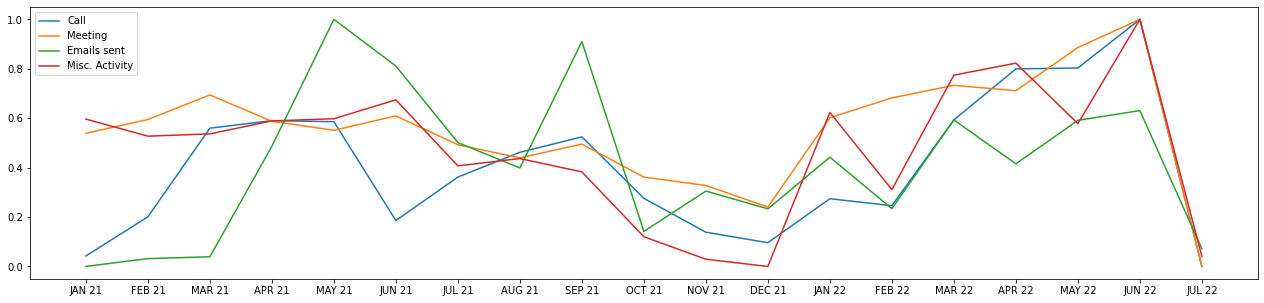

In [552]:
plt.figure(figsize=(22, 5))
plt.plot(normalized_df)
plt.legend(normalized_df.columns)

<h4>Activity Data</h4>

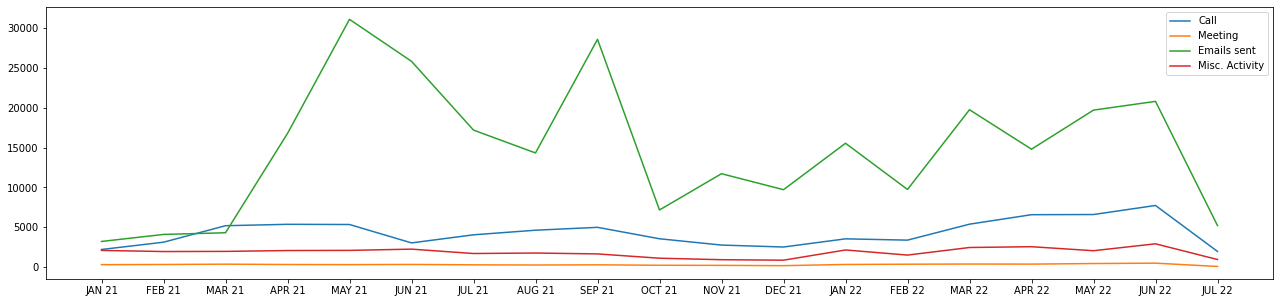

In [553]:
plt.figure(figsize=(22, 5))
plt.plot(activity_final)
plt.legend(activity_final.columns)

<h2>Web Traffic Section</h2>

In [554]:
web_traffic = pd.read_csv("web-traffic-by-month.csv")

In [555]:
web_traffic = web_traffic.set_index('Name')
web_traffic = web_traffic.transpose().fillna(0)
web_traffic

Name,Paid Search,Direct Traffic,Social Media,Referrals,Paid Social,Other Campaigns,Offline,Email Marketing,Organic Search,Broken down monthly
2021-01-01,866.0,3037.0,100.0,225.0,0.0,0.0,0.0,1.0,3620.0,0.0
2021-02-01,930.0,2257.0,114.0,150.0,0.0,0.0,0.0,2.0,4265.0,0.0
2021-03-01,1096.0,2247.0,95.0,174.0,0.0,0.0,0.0,1.0,7474.0,0.0
2021-04-01,320.0,1929.0,160.0,123.0,0.0,1.0,0.0,0.0,4613.0,0.0
2021-05-01,175.0,1802.0,169.0,119.0,0.0,4.0,0.0,0.0,4357.0,0.0
2021-06-01,5.0,1910.0,106.0,142.0,0.0,1.0,0.0,0.0,5232.0,0.0
2021-07-01,8.0,2108.0,108.0,132.0,0.0,1.0,0.0,1.0,4640.0,0.0
2021-08-01,3.0,1873.0,101.0,178.0,0.0,1.0,0.0,3.0,4201.0,0.0
2021-09-01,2.0,1953.0,133.0,142.0,0.0,0.0,0.0,0.0,4040.0,0.0
2021-10-01,2.0,1756.0,132.0,142.0,0.0,0.0,0.0,2.0,3570.0,0.0


In [556]:
web_traffic.drop(['Other Campaigns','Offline', 'Broken down monthly'], inplace=True, axis=1)

In [557]:
web_traffic

Name,Paid Search,Direct Traffic,Social Media,Referrals,Paid Social,Email Marketing,Organic Search
2021-01-01,866.0,3037.0,100.0,225.0,0.0,1.0,3620.0
2021-02-01,930.0,2257.0,114.0,150.0,0.0,2.0,4265.0
2021-03-01,1096.0,2247.0,95.0,174.0,0.0,1.0,7474.0
2021-04-01,320.0,1929.0,160.0,123.0,0.0,0.0,4613.0
2021-05-01,175.0,1802.0,169.0,119.0,0.0,0.0,4357.0
2021-06-01,5.0,1910.0,106.0,142.0,0.0,0.0,5232.0
2021-07-01,8.0,2108.0,108.0,132.0,0.0,1.0,4640.0
2021-08-01,3.0,1873.0,101.0,178.0,0.0,3.0,4201.0
2021-09-01,2.0,1953.0,133.0,142.0,0.0,0.0,4040.0
2021-10-01,2.0,1756.0,132.0,142.0,0.0,2.0,3570.0


In [558]:
web_traffic['Paid Traffic'] = web_traffic['Paid Search'] + web_traffic['Paid Social']

In [559]:
web_traffic.drop(['Paid Search','Paid Social'], inplace=True, axis=1)
web_traffic

Name,Direct Traffic,Social Media,Referrals,Email Marketing,Organic Search,Paid Traffic
2021-01-01,3037.0,100.0,225.0,1.0,3620.0,866.0
2021-02-01,2257.0,114.0,150.0,2.0,4265.0,930.0
2021-03-01,2247.0,95.0,174.0,1.0,7474.0,1096.0
2021-04-01,1929.0,160.0,123.0,0.0,4613.0,320.0
2021-05-01,1802.0,169.0,119.0,0.0,4357.0,175.0
2021-06-01,1910.0,106.0,142.0,0.0,5232.0,5.0
2021-07-01,2108.0,108.0,132.0,1.0,4640.0,8.0
2021-08-01,1873.0,101.0,178.0,3.0,4201.0,3.0
2021-09-01,1953.0,133.0,142.0,0.0,4040.0,2.0
2021-10-01,1756.0,132.0,142.0,2.0,3570.0,2.0


In [560]:
web_traffic['Organic Traffic'] = web_traffic['Organic Search'] + web_traffic['Referrals']+ web_traffic['Social Media']

In [283]:
web_traffic.drop(['Organic Search','Referrals', 'Social Media'], inplace=True, axis=1)
web_traffic

Name,Direct Traffic,Email Marketing,Paid Traffic,Organic Traffic
2021-01-01,3037.0,1.0,866.0,3945.0
2021-02-01,2257.0,2.0,930.0,4529.0
2021-03-01,2247.0,1.0,1096.0,7743.0
2021-04-01,1929.0,0.0,320.0,4896.0
2021-05-01,1802.0,0.0,175.0,4645.0
2021-06-01,1910.0,0.0,5.0,5480.0
2021-07-01,2108.0,1.0,8.0,4880.0
2021-08-01,1873.0,3.0,3.0,4480.0
2021-09-01,1953.0,0.0,2.0,4315.0
2021-10-01,1756.0,2.0,2.0,3844.0


In [284]:
web_traffic.drop(['Email Marketing'], inplace=True, axis=1)
web_traffic 

Name,Direct Traffic,Paid Traffic,Organic Traffic
2021-01-01,3037.0,866.0,3945.0
2021-02-01,2257.0,930.0,4529.0
2021-03-01,2247.0,1096.0,7743.0
2021-04-01,1929.0,320.0,4896.0
2021-05-01,1802.0,175.0,4645.0
2021-06-01,1910.0,5.0,5480.0
2021-07-01,2108.0,8.0,4880.0
2021-08-01,1873.0,3.0,4480.0
2021-09-01,1953.0,2.0,4315.0
2021-10-01,1756.0,2.0,3844.0


In [289]:
web_traffic = web_traffic.rename(index={'2021-01-01': 'JAN 21', '2021-02-01': 'FEB 21',
       '2021-03-01': 'MAR 21', '2021-04-01': 'APR 21', '2021-05-01': 'MAY 21', '2021-06-01': 'JUN 21', '2021-07-01': 'JUL 21', '2021-08-01': 'AUG 21',
       '2021-09-01': 'SEP 21', '2021-10-01': 'OCT 21', '2021-11-01': 'NOV 21', '2021-12-01': 'DEC 21', '2022-01-01': 'JAN 22', '2022-02-01': 'FEB 22', '2022-03-01': 'MAR 22', '2022-04-01': 'APR 22', '2022-05-01': 'MAY 22',
       '2022-06-01':'JUN 22', '2022-07-01': 'JUL 22'})
web_traffic

Name,Direct Traffic,Paid Traffic,Organic Traffic
JAN 21,3037.0,866.0,3945.0
FEB 21,2257.0,930.0,4529.0
MAR 21,2247.0,1096.0,7743.0
APR 21,1929.0,320.0,4896.0
MAY 21,1802.0,175.0,4645.0
JUN 21,1910.0,5.0,5480.0
JUL 21,2108.0,8.0,4880.0
AUG 21,1873.0,3.0,4480.0
SEP 21,1953.0,2.0,4315.0
OCT 21,1756.0,2.0,3844.0


In [290]:
n_web_traffic = normalize(web_traffic)

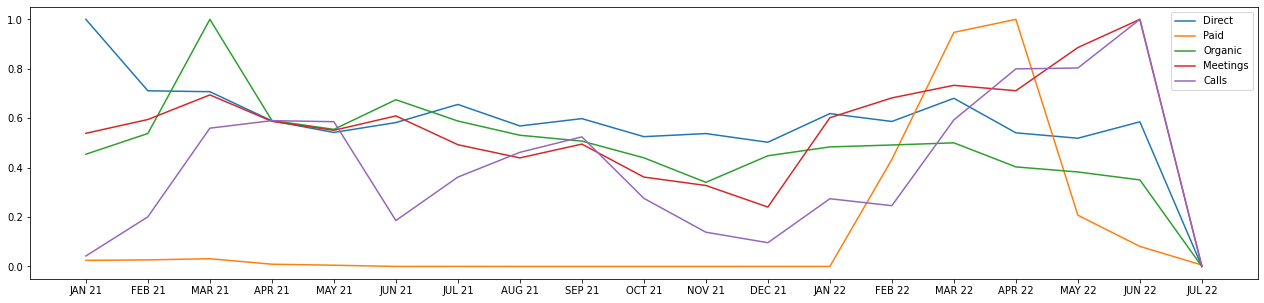

In [307]:
plt.figure(figsize=(22, 5))
plt.plot(n_web_traffic)

plt.plot(n_meetings)
plt.plot(n_calls)
plt.legend(['Direct', 'Paid', 'Organic', 'Meetings', 'Calls'])

<h2>Proposals</h2>

In [494]:
proposals = pd.read_csv("proposal-data.csv")

In [495]:
proposals

,Deal ID,Deal Name,Close Date,Create Date,Deal Stage,Deal Type,Amount,Monthly Recurring Revenue (MRR)
0,3936917986,City of Medford - Courtroom CMS,6/9/21 6:56,1/4/21 7:15,Closed - Lost,New MRR,125.00,NaN
1,3936948409,Legacy AVL C/O - Proj 2157,12/1/20 8:57,1/4/21 7:51,Closed - Won,Add-on Solution,9602.88,NaN
2,3938386633,Klockner Pentaplast of America - Beaver Siemen...,1/4/21 20:36,1/4/21 14:21,Closed - Won,Renewal,113.30,NaN
3,3938383792,Klockner Pentaplast of America - Greeneville S...,1/4/21 6:10,1/4/21 14:23,Closed - Won,Renewal,214.95,NaN
4,3945966000,State of New York - Unified Court System - CS1000,6/14/22 7:24,1/5/21 10:23,Closed - Lost,New MRR,21527.00,NaN
...,...,...,...,...,...,...,...,...
1735,9356824096,First United Methodist Video Box Sale,6/28/22 14:12,6/30/22 13:49,Closed - Won,Box Sale,53190.34,NaN
1736,8909533271,Luminis Health - DCMC BHP Carrier Remote Move ...,6/8/22 16:15,6/30/22 23:14,Closed - Won,Box Sale,1112.94,0.0
1737,9410758793,Mueller Industries - Cisco CMS Extended,11/7/22 16:00,7/6/22 0:18,Proposal,New MRR,6367.25,NaN
1738,9412973087,Source 1 Solutions - Nortel Onsite Support,7/8/22 6:40,7/6/22 6:29,Closed - Won,Labor Only,12400.00,0.0


In [496]:
proposals['Create Date'] = pd.to_datetime(proposals['Create Date'])
proposals.sort_values(by='Create Date')
proposals['date'] = proposals['Create Date'].dt.year.astype(str) + " - " + proposals['Create Date'].dt.month.astype(str)
proposals = proposals.fillna(0)

In [497]:
proposals_value_MRR = pd.DataFrame(proposals)

In [498]:
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'New MRR', 'MRR'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Carrier Services', 'MRR'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Add-on MRR', 'MRR'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Connect - Calling Plan', 'MRR'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Renewal', 'MRR'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'MRR', 'MRR'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Solution Design + Deploy + MRR', 'MRR'] = True

proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'New Solution', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Solution Deploy', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Solution Design + Deploy + MRR', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Labor Only', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Connect - MTR', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Box Sale', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 'Add-on Solution', 'Solution'] = True
proposals_value_MRR.loc[proposals_value_MRR['Deal Type'] == 0, 'Solution'] = True

proposals_value_MRR

,Deal ID,Deal Name,Close Date,Create Date,Deal Stage,Deal Type,Amount,Monthly Recurring Revenue (MRR),date,MRR,Solution
0,3936917986,City of Medford - Courtroom CMS,6/9/21 6:56,2021-01-04 07:15:00,Closed - Lost,New MRR,125.00,0.0,2021 - 1,True,NaN
1,3936948409,Legacy AVL C/O - Proj 2157,12/1/20 8:57,2021-01-04 07:51:00,Closed - Won,Add-on Solution,9602.88,0.0,2021 - 1,NaN,True
2,3938386633,Klockner Pentaplast of America - Beaver Siemen...,1/4/21 20:36,2021-01-04 14:21:00,Closed - Won,Renewal,113.30,0.0,2021 - 1,True,NaN
3,3938383792,Klockner Pentaplast of America - Greeneville S...,1/4/21 6:10,2021-01-04 14:23:00,Closed - Won,Renewal,214.95,0.0,2021 - 1,True,NaN
4,3945966000,State of New York - Unified Court System - CS1000,6/14/22 7:24,2021-01-05 10:23:00,Closed - Lost,New MRR,21527.00,0.0,2021 - 1,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1735,9356824096,First United Methodist Video Box Sale,6/28/22 14:12,2022-06-30 13:49:00,Closed - Won,Box Sale,53190.34,0.0,2022 - 6,NaN,True
1736,8909533271,Luminis Health - DCMC BHP Carrier Remote Move ...,6/8/22 16:15,2022-06-30 23:14:00,Closed - Won,Box Sale,1112.94,0.0,2022 - 6,NaN,True
1737,9410758793,Mueller Industries - Cisco CMS Extended,11/7/22 16:00,2022-07-06 00:18:00,Proposal,New MRR,6367.25,0.0,2022 - 7,True,NaN
1738,9412973087,Source 1 Solutions - Nortel Onsite Support,7/8/22 6:40,2022-07-06 06:29:00,Closed - Won,Labor Only,12400.00,0.0,2022 - 7,NaN,True


In [499]:
proposals_value_MRR['MRR'] = proposals_value_MRR['MRR'].fillna(False)
proposals_value_MRR['Solution'] = proposals_value_MRR['Solution'].fillna(False)
proposals_value_MRR

,Deal ID,Deal Name,Close Date,Create Date,Deal Stage,Deal Type,Amount,Monthly Recurring Revenue (MRR),date,MRR,Solution
0,3936917986,City of Medford - Courtroom CMS,6/9/21 6:56,2021-01-04 07:15:00,Closed - Lost,New MRR,125.00,0.0,2021 - 1,True,False
1,3936948409,Legacy AVL C/O - Proj 2157,12/1/20 8:57,2021-01-04 07:51:00,Closed - Won,Add-on Solution,9602.88,0.0,2021 - 1,False,True
2,3938386633,Klockner Pentaplast of America - Beaver Siemen...,1/4/21 20:36,2021-01-04 14:21:00,Closed - Won,Renewal,113.30,0.0,2021 - 1,True,False
3,3938383792,Klockner Pentaplast of America - Greeneville S...,1/4/21 6:10,2021-01-04 14:23:00,Closed - Won,Renewal,214.95,0.0,2021 - 1,True,False
4,3945966000,State of New York - Unified Court System - CS1000,6/14/22 7:24,2021-01-05 10:23:00,Closed - Lost,New MRR,21527.00,0.0,2021 - 1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1735,9356824096,First United Methodist Video Box Sale,6/28/22 14:12,2022-06-30 13:49:00,Closed - Won,Box Sale,53190.34,0.0,2022 - 6,False,True
1736,8909533271,Luminis Health - DCMC BHP Carrier Remote Move ...,6/8/22 16:15,2022-06-30 23:14:00,Closed - Won,Box Sale,1112.94,0.0,2022 - 6,False,True
1737,9410758793,Mueller Industries - Cisco CMS Extended,11/7/22 16:00,2022-07-06 00:18:00,Proposal,New MRR,6367.25,0.0,2022 - 7,True,False
1738,9412973087,Source 1 Solutions - Nortel Onsite Support,7/8/22 6:40,2022-07-06 06:29:00,Closed - Won,Labor Only,12400.00,0.0,2022 - 7,False,True


In [500]:

proposals_value_solution = pd.DataFrame(proposals_value_MRR.loc[proposals_value_MRR['Solution']])
proposals_value_solution

,Deal ID,Deal Name,Close Date,Create Date,Deal Stage,Deal Type,Amount,Monthly Recurring Revenue (MRR),date,MRR,Solution
1,3936948409,Legacy AVL C/O - Proj 2157,12/1/20 8:57,2021-01-04 07:51:00,Closed - Won,Add-on Solution,9602.88,0.0,2021 - 1,False,True
8,3949953301,"Recreational Equipment, Inc. - Cisco Wireless ...",1/6/23 16:00,2021-01-06 06:52:00,Proposal,New Solution,15176.88,0.0,2021 - 1,False,True
10,3952493745,JAXJOX Power Disconnect,3/24/21 14:21,2021-01-06 14:53:00,Closed - Won,Box Sale,5878.75,0.0,2021 - 1,False,True
12,3956269504,AAA National - Audiocodes Support Renewal 2021...,10/1/21 9:50,2021-01-06 15:32:00,Closed - Lost,Box Sale,6569.18,0.0,2021 - 1,False,True
13,3952642764,AVX Corporation - Teams DR - Design Deploy - T...,7/29/21 10:25,2021-01-06 17:19:00,Closed - Won,New Solution,90512.44,0.0,2021 - 1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1734,9072520827,Basco Shower Door - Annual SWA,1/6/23 16:00,2022-06-30 13:18:00,Proposal,Box Sale,13300.00,0.0,2022 - 6,False,True
1735,9356824096,First United Methodist Video Box Sale,6/28/22 14:12,2022-06-30 13:49:00,Closed - Won,Box Sale,53190.34,0.0,2022 - 6,False,True
1736,8909533271,Luminis Health - DCMC BHP Carrier Remote Move ...,6/8/22 16:15,2022-06-30 23:14:00,Closed - Won,Box Sale,1112.94,0.0,2022 - 6,False,True
1738,9412973087,Source 1 Solutions - Nortel Onsite Support,7/8/22 6:40,2022-07-06 06:29:00,Closed - Won,Labor Only,12400.00,0.0,2022 - 7,False,True


In [529]:
proposals_value_MRR = pd.DataFrame(proposals_value_MRR.loc[proposals_value_MRR['MRR']])
proposals_value_MRR = proposals_value_MRR[['date','Amount','Monthly Recurring Revenue (MRR)','Deal Type']]
proposals_value_MRR = proposals_value_MRR


KeyError: 'MRR'

In [533]:
len(proposals_value_MRR)

888

In [527]:
index_MRR = proposals_value_MRR.index


5

In [534]:
hi = [x if x !=0 else 0 for x in proposals_value_MRR['Monthly Recurring Revenue (MRR)']]
# proposals_value_MRR['new amount'] = proposals_value_MRR['amount
hi
for x in range(len(hi)-1):
    if hi[x] == 0:
        hi[x] = proposals_value_MRR['Amount'][index_MRR[x]]
len(hi)

888

In [532]:
proposals_value_MRR['New Amount'] = pd.Series(hi)
proposals_value_MRR

,date,Amount,Monthly Recurring Revenue (MRR),Deal Type,New Amount
0,2021 - 1,125.00,0.00,New MRR,125.00
2,2021 - 1,113.30,0.00,Renewal,214.95
3,2021 - 1,214.95,0.00,Renewal,21527.00
4,2021 - 1,21527.00,0.00,New MRR,3003.71
5,2021 - 1,3003.71,0.00,Renewal,668.00
...,...,...,...,...,...
1722,2022 - 6,42200.00,3475.00,New MRR,NaN
1724,2022 - 6,0.00,3257.00,Solution Design + Deploy + MRR,NaN
1726,2022 - 6,0.00,848.00,New MRR,NaN
1730,2022 - 6,13204.92,1100.41,Renewal,NaN


In [516]:
proposals_value_MRR_p = proposals_value_MRR.pivot_table(values='Amount', index='date', aggfunc='sum')
# proposals_value_MRR.loc[proposals_value_MRR['date'] == '2021 - 1']['Amount'].sum()


,Amount
date,
2021 - 1,197249.05
2021 - 10,755075.63
2021 - 11,500581.60
2021 - 12,896527.81
2021 - 2,219835.82
2021 - 3,324529.33
2021 - 4,267585.74
2021 - 5,339985.65
2021 - 6,645232.49


In [504]:
proposals_value_MRR['Deal Type'] == 'Add-on MRR'

0       False
2       False
3       False
4       False
5       False
        ...  
1722    False
1724    False
1726    False
1730    False
1737    False
Name: Deal Type, Length: 888, dtype: bool

In [399]:
proposals_value_MRR

,Deal ID,Deal Name,Close Date,Create Date,Deal Stage,Deal Type,Amount,Monthly Recurring Revenue (MRR),date,MRR,Solution
0,3936917986,City of Medford - Courtroom CMS,6/9/21 6:56,2021-01-04 07:15:00,Closed - Lost,New MRR,125.00,0.0,2021 - 1,True,True
1,3936948409,Legacy AVL C/O - Proj 2157,12/1/20 8:57,2021-01-04 07:51:00,Closed - Won,Add-on Solution,9602.88,0.0,2021 - 1,False,True
2,3938386633,Klockner Pentaplast of America - Beaver Siemen...,1/4/21 20:36,2021-01-04 14:21:00,Closed - Won,Renewal,113.30,0.0,2021 - 1,True,True
3,3938383792,Klockner Pentaplast of America - Greeneville S...,1/4/21 6:10,2021-01-04 14:23:00,Closed - Won,Renewal,214.95,0.0,2021 - 1,True,True
4,3945966000,State of New York - Unified Court System - CS1000,6/14/22 7:24,2021-01-05 10:23:00,Closed - Lost,New MRR,21527.00,0.0,2021 - 1,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1735,9356824096,First United Methodist Video Box Sale,6/28/22 14:12,2022-06-30 13:49:00,Closed - Won,Box Sale,53190.34,0.0,2022 - 6,False,True
1736,8909533271,Luminis Health - DCMC BHP Carrier Remote Move ...,6/8/22 16:15,2022-06-30 23:14:00,Closed - Won,Box Sale,1112.94,0.0,2022 - 6,False,True
1737,9410758793,Mueller Industries - Cisco CMS Extended,11/7/22 16:00,2022-07-06 00:18:00,Proposal,New MRR,6367.25,0.0,2022 - 7,True,True
1738,9412973087,Source 1 Solutions - Nortel Onsite Support,7/8/22 6:40,2022-07-06 06:29:00,Closed - Won,Labor Only,12400.00,0.0,2022 - 7,False,True


In [341]:
proposals_count = proposals 
proposals_count

,Deal ID,Deal Name,Close Date,Create Date,Deal Stage,Deal Type,Amount,Monthly Recurring Revenue (MRR),date
0,3936917986,City of Medford - Courtroom CMS,6/9/21 6:56,2021-01-04 07:15:00,Closed - Lost,New MRR,125.00,0.0,2021 - 1
1,3936948409,Legacy AVL C/O - Proj 2157,12/1/20 8:57,2021-01-04 07:51:00,Closed - Won,Add-on Solution,9602.88,0.0,2021 - 1
2,3938386633,Klockner Pentaplast of America - Beaver Siemen...,1/4/21 20:36,2021-01-04 14:21:00,Closed - Won,Renewal,113.30,0.0,2021 - 1
3,3938383792,Klockner Pentaplast of America - Greeneville S...,1/4/21 6:10,2021-01-04 14:23:00,Closed - Won,Renewal,214.95,0.0,2021 - 1
4,3945966000,State of New York - Unified Court System - CS1000,6/14/22 7:24,2021-01-05 10:23:00,Closed - Lost,New MRR,21527.00,0.0,2021 - 1
...,...,...,...,...,...,...,...,...,...
1735,9356824096,First United Methodist Video Box Sale,6/28/22 14:12,2022-06-30 13:49:00,Closed - Won,Box Sale,53190.34,0.0,2022 - 6
1736,8909533271,Luminis Health - DCMC BHP Carrier Remote Move ...,6/8/22 16:15,2022-06-30 23:14:00,Closed - Won,Box Sale,1112.94,0.0,2022 - 6
1737,9410758793,Mueller Industries - Cisco CMS Extended,11/7/22 16:00,2022-07-06 00:18:00,Proposal,New MRR,6367.25,0.0,2022 - 7
1738,9412973087,Source 1 Solutions - Nortel Onsite Support,7/8/22 6:40,2022-07-06 06:29:00,Closed - Won,Labor Only,12400.00,0.0,2022 - 7


In [342]:
proposals_count.drop(['Deal ID', 'Deal Name', 'Close Date', 'Deal Stage'], inplace=True, axis=1)


In [343]:
proposals_count.drop(['Create Date', 'Amount', 'Monthly Recurring Revenue (MRR)'], inplace=True, axis=1)

In [344]:
proposals_count

,Deal Type,date
0,New MRR,2021 - 1
1,Add-on Solution,2021 - 1
2,Renewal,2021 - 1
3,Renewal,2021 - 1
4,New MRR,2021 - 1
...,...,...
1735,Box Sale,2022 - 6
1736,Box Sale,2022 - 6
1737,New MRR,2022 - 7
1738,Labor Only,2022 - 7


In [345]:
proposals_count = proposals_count.pivot_table(values="Deal Type", index='date', aggfunc='count')
proposals_count

,Deal Type
date,
2021 - 1,106
2021 - 10,88
2021 - 11,154
2021 - 12,119
2021 - 2,71
2021 - 3,107
2021 - 4,99
2021 - 5,89
2021 - 6,106


In [346]:

proposals_count = proposals_count.reindex(['2021 - 1', '2021 - 2',
       '2021 - 3', '2021 - 4', '2021 - 5', '2021 - 6', '2021 - 7', '2021 - 8',
       '2021 - 9', '2021 - 10', '2021 - 11', '2021 - 12', '2022 - 1', '2022 - 2', '2022 - 3', '2022 - 4', '2022 - 5',
       '2022 - 6', '2022 - 7'])

proposals_count = proposals_count.rename(index={'2021 - 1': 'JAN 21', '2021 - 2': 'FEB 21',
       '2021 - 3': 'MAR 21', '2021 - 4': 'APR 21', '2021 - 5': 'MAY 21', '2021 - 6': 'JUN 21', '2021 - 7': 'JUL 21', '2021 - 8': 'AUG 21',
       '2021 - 9': 'SEP 21', '2021 - 10': 'OCT 21', '2021 - 11': 'NOV 21', '2021 - 12': 'DEC 21', '2022 - 1': 'JAN 22', '2022 - 2': 'FEB 22', '2022 - 3': 'MAR 22', '2022 - 4': 'APR 22', '2022 - 5': 'MAY 22',
       '2022 - 6':'JUN 22', '2022 - 7': 'JUL 22'})
proposals_count

,Deal Type
date,
JAN 21,106
FEB 21,71
MAR 21,107
APR 21,99
MAY 21,89
JUN 21,106
JUL 21,73
AUG 21,73
SEP 21,98


In [349]:
n_proposal_count = normalize(proposals_count)


In [350]:
n_proposal_count

,Deal Type
date,
JAN 21,0.682119
FEB 21,0.450331
MAR 21,0.688742
APR 21,0.635762
MAY 21,0.569536
JUN 21,0.682119
JUL 21,0.463576
AUG 21,0.463576
SEP 21,0.629139


<h3>Graphs</h3>

<h4>Proposal Count - with Meetings and Calls</h4>

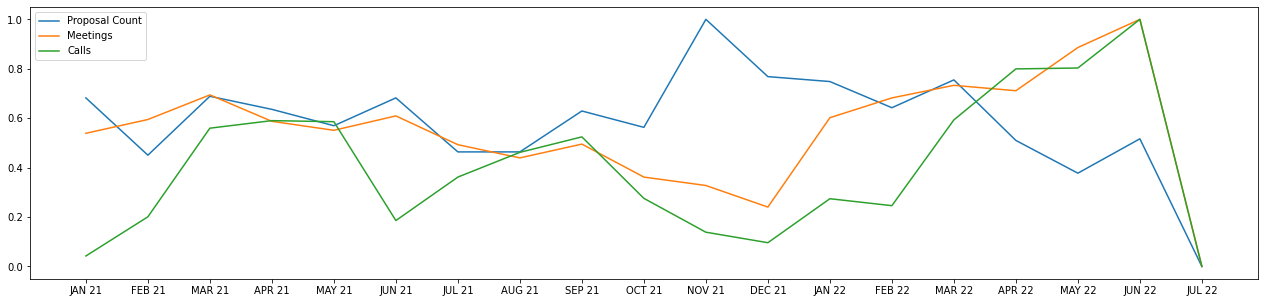

In [355]:
plt.figure(figsize=(22, 5))
plt.plot(n_proposal_count)
plt.plot(n_meetings)
plt.plot(n_calls)
plt.legend(['Proposal Count', 'Meetings', 'Calls'])

<h2>Inbound Leads</h2>


In [535]:
inbound_contacts = pd.read_csv("inbound-contacts.csv")

In [536]:
inbound_contacts

,Contact ID,First Conversion Date,Inbound Status
0,11061751,1/14/21 6:47,Lead
1,11111901,1/18/21 10:23,Qualified
2,288113,1/21/21 8:54,Qualified
3,11205601,1/25/21 12:22,Lead
4,11207651,1/25/21 14:24,NaN
...,...,...,...
219,21620151,7/6/22 11:15,Lead
220,21717001,7/6/22 18:30,Unqualified
221,21722801,7/7/22 8:31,Lead - Current Customer
222,21734351,7/8/22 7:08,Unqualified


In [ ]:
inbound_contacts['Qualified'] = 